In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
from keras import models
from keras import layers

# CNN

## Load Data

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


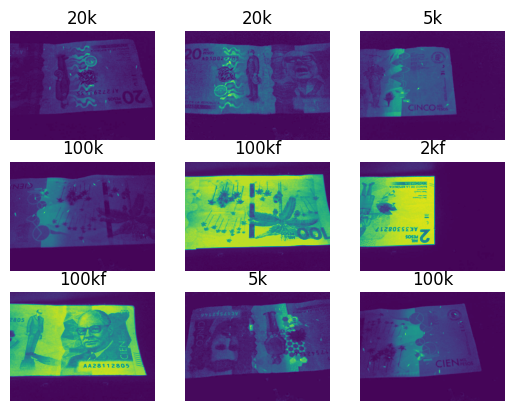

In [ ]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(color="grayscale")
cf.PeakData(train_ds, class_names)

## Run model

In [ ]:
#Define model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
for filter_count in conv_layers:
    model.add(tf.keras.layers.Conv2D(filter_count,3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
for layer_count in layers:
    model.add(tf.keras.layers.Dense(layer_count, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(len(class_names)))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


Epoch 1/5
128/390 [========>.....................] - ETA: 26s - loss: 1948.9923 - accuracy: 0.2742

KeyboardInterrupt: 

In [ ]:
#Fit model
history = model.fit(
  train_ds = train_ds,
  validation_data = validation_ds,
  epochs=5)

# Model evaluation metrics

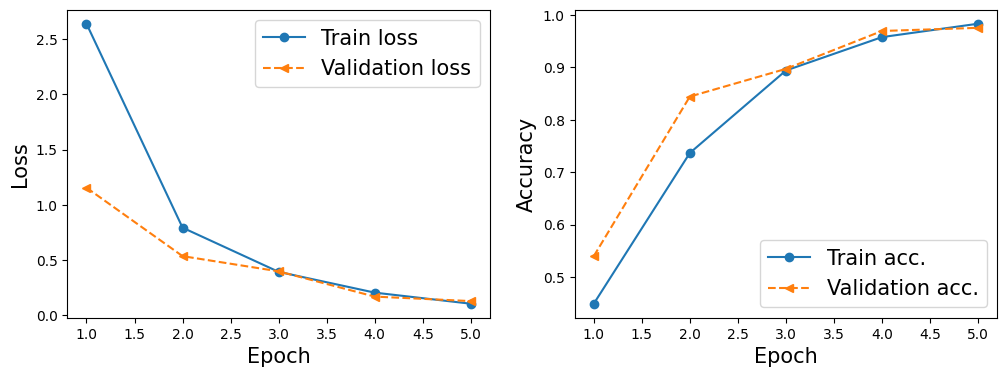

130/130 - 5s - loss: 0.1246 - accuracy: 0.9767 - 5s/epoch - 38ms/step
Test loss: 0.12463682889938354 | Test accuracy: 0.9766826629638672


(0.9835724234580994, 0.9757211804389954, 0.9766826629638672)

In [ ]:
cf.EvaluateModel(model, test_ds.map(cf.AugmentImage(contrast=0.5)), history)

In [ ]:
cf.precision_recall_metrics(model, test_ds, class_names)